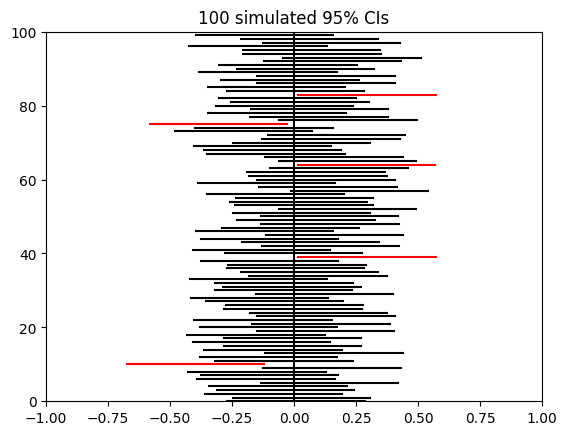

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, t, chi2
from scipy.optimize import brentq

# Simulating a z CI
R = 100
n = 50  # sample size (does not affect confidence!)
m = 0  # Choose the true value of the mean
d = np.random.normal(loc=m, size=(R, n))  # the correct value of mu of st. normal is 0
out = np.zeros((R, 2))

plt.figure()
plt.xlim(-1, 1)
plt.ylim(0, R)
plt.title("100 simulated 95% CIs")

# Simulating R CIs
for i in range(R):
    out[i, 0] = np.mean(d[i, :]) - norm.ppf(0.975) / np.sqrt(n)  # l(x)
    out[i, 1] = np.mean(d[i, :]) + norm.ppf(0.975) / np.sqrt(n)  # u(x)
    if (out[i, 0] < 0) and (out[i, 1] > 0):
        plt.plot([out[i, 0], out[i, 1]], [i, i], color='black')
    else:
        plt.plot([out[i, 0], out[i, 1]], [i, i], color='red')

plt.axvline(x=m, color='black')

In [12]:
# Example 2: Exponential CI
l = 10  # Choose the true value of the parameter
n = 15  # sample size
x = np.random.exponential(scale=1/l, size=n)  # simulate some data

# Compute 95% CI for lambda:
ci_lambda = (gamma.ppf(0.025, n, scale=1) / np.sum(x), gamma.ppf(0.975, n, scale=1) / np.sum(x))
ci_lambda

(5.245431000429276, 14.676297774997739)

In [14]:
import scipy.stats as st
# Example: t CI
# read in some data
x = np.array([3, 7, 11, 0, 7, 0, 4, 5, 6, 2])

# Compute a 88% CI for the population mean
ci_t = t.interval(0.88, len(x)-1, loc=np.mean(x), scale=st.sem(x))
ci_t

(2.6315982587598374, 6.368401741240162)

In [ ]:

from scipy.optimize import fsolve
# Profile likelihood CI example
p0 = 0.9
n = 50  # sample size
x = np.random.binomial(n, p0)
p_hat = x / n
grid = np.linspace(0.7, 1, 100)

# Define the -2loglikelihood ratio for binomial
def G2(p):
    return 2 * (x * np.log(p_hat / p) + (n - x) * np.log((1 - p_hat) / (1 - p)))

plt.figure()
plt.plot(grid, G2(grid))
plt.axhline(y=chi2.ppf(0.95, 1), color='red')

def G2s(p):
    return G2(p) - chi2.ppf(0.95, 1)

# Finding roots
lower_bound = 0.01
upper_bound = 0.999

root1 = fsolve(G2s, lower_bound)
print(root1)
root2 = fsolve(G2s, upper_bound)
print(root2)


# Compare to z CI
z_ci = (p_hat - 1.96 * np.sqrt(p_hat * (1 - p_hat) / n), p_hat + 1.96 * np.sqrt(p_hat * (1 - p_hat) / n))
print(z_ci)
